# ==========================================
# Gradient Boosting Classifier
# ==========================================

In [4]:
# ==========================================
# Gradient Boosting Classifier
# ==========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Varejo.csv')
df.head()

,GInfMid,Idade,GastoTot,Tempo,CompEmbRec,Dummy_F
0,10,47,900.00,15,0,0
1,12,66,18000.00,2,0,1
2,6,65,18322.92,10,0,1
3,9,69,3000.00,4,0,1
4,4,69,30000.00,4,0,0


In [5]:
# ==========================================
# 2. Separação em treino e teste
# ==========================================
X = df.drop("CompEmbRec", axis=1)
y = df["CompEmbRec"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [7]:

# ==========================================
# 3. Treinamento do modelo GBM
# ==========================================
gbm = GradientBoostingClassifier(
    n_estimators=200,     # número de árvores (aumentar pode melhorar performance)
    learning_rate=0.1,    # taxa de aprendizado (menor = mais lento, mas mais preciso)
    max_depth=3,          # profundidade das árvores
    random_state=42
)
gbm.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=200, random_state=42)


Acurácia: 0.7766666666666666

Matriz de Confusão:
 [[116  34]
 [ 33 117]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78       150
           1       0.77      0.78      0.78       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



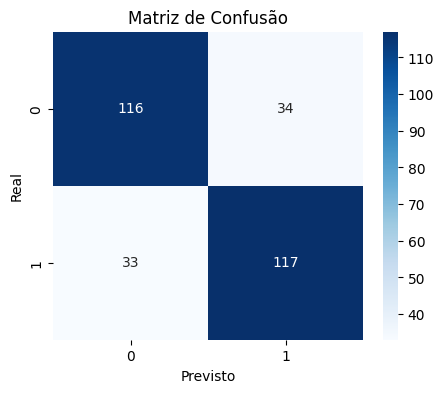

In [8]:
# ==========================================
# 4. Avaliação
# ==========================================
y_pred = gbm.predict(X_test)

print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão em heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

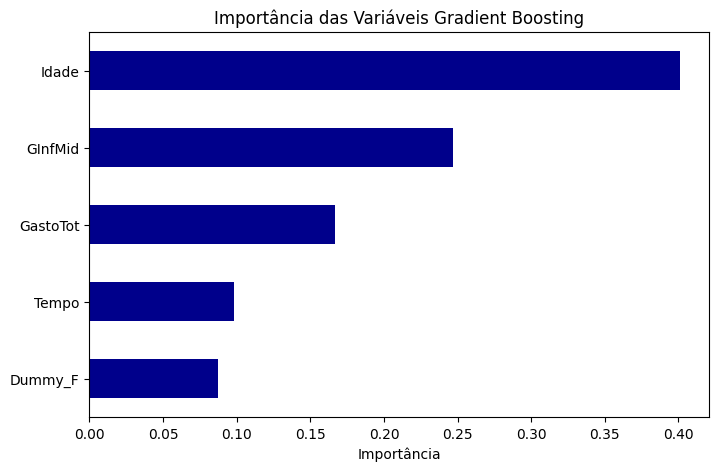


Importância das Variáveis:
Idade       0.401000
GInfMid     0.247111
GastoTot    0.166730
Tempo       0.097831
Dummy_F     0.087327
dtype: float64

Importância das Variáveis:
Idade       0.401000
GInfMid     0.247111
GastoTot    0.166730
Tempo       0.097831
Dummy_F     0.087327
dtype: float64


In [9]:
# ==========================================
# 5. Importância das Variáveis
# ==========================================
importancias = pd.Series(gbm.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=True)

plt.figure(figsize=(8,5))
importancias.plot(kind="barh", color="darkblue")
plt.title("Importância das Variáveis Gradient Boosting")
plt.xlabel("Importância")
plt.show()

print("\nImportância das Variáveis:")
print(importancias.sort_values(ascending=False))

print("\nImportância das Variáveis:")
print(importancias.sort_values(ascending=False))

In [10]:
# ==========================================
# 3. Treinamento do modelo XGBoost
# ==========================================
xgb = XGBClassifier(
    n_estimators=300,       # número de árvores
    learning_rate=0.1,      # taxa de aprendizado
    max_depth=4,            # profundidade das árvores
    subsample=0.8,          # amostragem das linhas (para evitar overfitting)
    colsample_bytree=0.8,   # amostragem das colunas (para evitar overfitting)
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
xgb.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:55:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [11]:

# ==========================================
# 4. Avaliação do modelo
# ==========================================
y_pred = xgb.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.7666666666666667

Matriz de Confusão:
 [[118  32]
 [ 38 112]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       150
           1       0.78      0.75      0.76       150

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



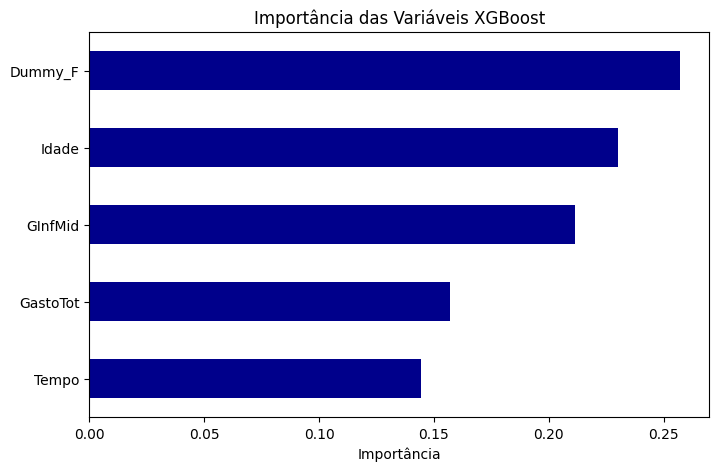


Importância das Variáveis:
Dummy_F     0.257101
Idade       0.230241
GInfMid     0.211208
GastoTot    0.157149
Tempo       0.144302
dtype: float32

Importância das Variáveis:
Dummy_F     0.257101
Idade       0.230241
GInfMid     0.211208
GastoTot    0.157149
Tempo       0.144302
dtype: float32


In [12]:
# ==========================================
# 5. Importância das Variáveis
# ==========================================
importancias = pd.Series(xgb.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=True)

plt.figure(figsize=(8,5))
importancias.plot(kind="barh", color="darkblue")
plt.title("Importância das Variáveis XGBoost")
plt.xlabel("Importância")
plt.show()

print("\nImportância das Variáveis:")
print(importancias.sort_values(ascending=False))

print("\nImportância das Variáveis:")
print(importancias.sort_values(ascending=False))

In [13]:
# ==========================================
# 3. Treinamento do modelo LightGBM
# ==========================================
lgbm = lgb.LGBMClassifier(
    n_estimators=300,      # número de árvores
    learning_rate=0.1,     # taxa de aprendizado
    max_depth=-1,          # sem limite de profundidade
    subsample=0.8,         # amostragem das linhas
    colsample_bytree=0.8,  # amostragem das colunas
    random_state=42
)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 350, number of negative: 350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

LGBMClassifier(colsample_bytree=0.8, n_estimators=300, random_state=42,
               subsample=0.8)

In [14]:

# ==========================================
# 4. Avaliação do modelo
# ==========================================
y_pred = lgbm.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7566666666666667

Matriz de Confusão:
 [[112  38]
 [ 35 115]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       150
           1       0.75      0.77      0.76       150

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



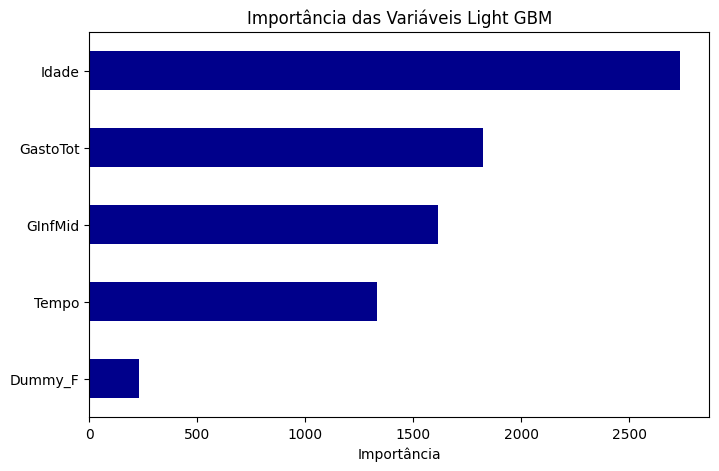


Importância das Variáveis:
Idade       2735
GastoTot    1825
GInfMid     1614
Tempo       1333
Dummy_F      229
dtype: int32

Importância das Variáveis:
Idade       2735
GastoTot    1825
GInfMid     1614
Tempo       1333
Dummy_F      229
dtype: int32


In [15]:
  # ==========================================
# 5. Importância das Variáveis
# ==========================================
importancias = pd.Series(lgbm.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=True)

plt.figure(figsize=(8,5))
importancias.plot(kind="barh", color="darkblue")
plt.title("Importância das Variáveis Light GBM")
plt.xlabel("Importância")
plt.show()

print("\nImportância das Variáveis:")
print(importancias.sort_values(ascending=False))

print("\nImportância das Variáveis:")
print(importancias.sort_values(ascending=False))